# Hands-On Exercise 6.2:
# Working With a Neural Network Using Python
***

## Objectives

#### In this exercise, you will work with a neural network using Python. This exercise allows you to predict a target variable from a number of predictor variables. The goal is to show you how neural networks can be used to predict unknown values from a model trained on an existing data set.

### Overview

You will work on a data set called wines that you will import from a csv file. 

You will:<br>
● Review the distribution of the target variable and transform it into a format suitable for use with a neural network<br>
● Examine the predictor variables<br>
● Train a neural network that can be used to make future predictions<br><br>

**Pre-step: Execute the following cell in order to suppress warning messages**

In [1]:
import warnings
warnings.filterwarnings("ignore")

**Major Step 1: Data loading and text preprocessing**

1. ❏ Import the **pandas** package

In [2]:
import pandas as pd

2. ❏ Import the **wines.csv** dataset into a dataframe

In [3]:
wines = pd.read_csv('wines.csv')

3. ❏ View the columns in the dataframe 

In [4]:
wines.columns 

Index(['label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280_OD315_of_diluted_wines', 'Proline'],
      dtype='object')

4. ❏ View a preview of the wines dataframe

In [5]:
wines.head()

,label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


5. ❏ Normalize the data in the dataframe through scaling using the **MinMaxScaler** library from **sklearn.preprocessing**<br><br>
*Info: MinMaxScaler rescales the data set such that all feature values are in the range 0 to 1*

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
winesScaled = pd.DataFrame(scaler.fit_transform(wines.iloc[:,1:14]), columns=wines.columns[1:14])

6. ❏ View the scaled data

In [7]:
winesScaled.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


7. ❏ One hot encode the target variable into three separate variables. Use the prefix **label** for each of the column names

In [8]:
onehotTarget = pd.get_dummies(wines['label'],prefix='label')
onehotTarget.head()

,label_1,label_2,label_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


8. ❏ Split the dataset into a training and test dataset using the **train_test_split()** function from **sklearn.model_selection**

In [9]:
from sklearn.model_selection import train_test_split
Pred_train, Pred_test, Target_train, Target_test = train_test_split(winesScaled, onehotTarget)

9. ❏ Examing the size of the resulting 4 datasets using the **.shape** attribute

In [10]:
Pred_train.shape

(133, 13)

In [11]:
Pred_test.shape

(45, 13)

In [12]:
Target_train.shape

(133, 3)

In [13]:
Target_test.shape

(45, 3)

10. ❏ Instantiate a neural net model. Experiment with hidden layer sizes. (eg.10,10,10). Use a **tanh** activation function

In [14]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation="tanh")

11. ❏ Train the model with the training datasets (the prediction dataset and the target dataset)

In [15]:
mlp.fit(Pred_train,Target_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10, 10))

12. ❏ Using the trained model, generate predictions for the test dataset

In [16]:
predictions = mlp.predict(Pred_test)

predictions

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 1],
       [1, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

13. ❏ Build a **confusion matrix**

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(
    Target_test.values.argmax(axis=1), 
    predictions.argmax(axis=1) 
))

[[ 9  0  0]
 [ 3 19  1]
 [ 1  0 12]]


14. ❏ Build a **classification report** for the predictions

In [18]:
print(classification_report(Target_test,predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.91      0.95        23
           2       0.87      1.00      0.93        13

   micro avg       0.90      0.96      0.92        45
   macro avg       0.87      0.97      0.91        45
weighted avg       0.91      0.96      0.93        45
 samples avg       0.91      0.96      0.93        45



## <center>**Congratulations! You have completed the exercise.**</center>

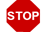

# <center>**This is the end of the exercise.**</center>